# Tutorial to produce 2 Wilson coefficient exclusion plots
In this tutorial, we will reproduce figures 11, 12 and 13 of our work <a href="#AlpacaPheno">[0]</a>, where the exclusion plot is obtained for the parameter space of $(c_u/f_a)$ vs $(c_\ell/f_a)$, $(c_d/f_a)$ vs $(c_\ell/f_a)$ and $(c_u/f_a)$ vs $(c_d/f_a)$. 
We will study an ALP of mass $m_a=0.3$ GeV

In [1]:
from alpaca.statistics.chisquared import get_chi2
from alpaca.statistics import combine_chi2
from alpaca.statistics.functions import nsigmas
from alpaca import ALPcouplings
from alpaca import sectors

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12, 'text.usetex': True, 'font.family': 'serif', 'font.serif': 'Computer Modern Roman'})
from alpaca.plotting.mpl import exclusionplot

In [2]:
from alpaca import ALPcouplingsEncoder, ALPcouplingsDecoder
import json

First we select the sectors we are interested in studying

In [3]:
# Transitions with sectors
transitions_all=[
    sectors.default_sectors['all'], #Includes all available sectors
    sectors.default_sectors['bda_lfu'], #B -> pi transitions LFU
    sectors.default_sectors['bda_lfv'], #B -> pi transitions LFV
    sectors.default_sectors['BKinv'],   #B -> K inv
    sectors.default_sectors['sda_lfu'], #K -> pi transitions LFU
    sectors.default_sectors['sda_lfv']] #K -> pi transitions LFV

In [4]:
ma = 0.3 #GeV, value of mass
fa = 1e3 #GeV, value of scale

## Coupling calculation $c_u$ vs $c_e$

The Lagrangian we work with is $$\mathcal{L}=\frac{\partial_\mu a}{f_a}(\overline{\ell_L}\gamma^\mu c_e\ell_L)+\frac{\partial_\mu a}{f_a}(\overline{u_R}\gamma^\mu c_u u_R).$$

First we will assume $c_u$ to be positive and then we will make the assumption of $c_u<0$.

### $c_u$>0

In [29]:
cu_vec_pos = np.logspace(-5, 0, 5) #Vector of couplings c_u
ce_vec_pos = np.logspace(-5, 0, 5) #Vector of couplings c_e

#Create meshgrid of couplings
cu_pos, ce_pos = np.meshgrid(cu_vec_pos, ce_vec_pos)

# Flatten the meshgrid arrays
cu_flat = cu_pos.flatten()
ce_flat = ce_pos.flatten()

Coupling calculation

In [30]:
# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cu_val, ce_val in zip(cu_flat, ce_flat):
    coupling = ALPcouplings({'cuR': cu_val, 'clL': ce_val}, scale=fa, basis='derivative_above').\
        match_run(5.1, 'VA_below', 'leadinglog', match_tildecouplings=True) 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_grid_pos_cuce = np.array(couplings_list).reshape(cu_pos.shape)

Store the couplings in a file

In [ ]:
with open('couplings_array_pos_cuvsce.json', 'wt') as f:
    json.dump(couplings_grid_pos_cuce.tolist(), f, cls=ALPcouplingsEncoder)

### $c_u$<0

In [31]:
cu_vec_neg = -np.logspace(-5, 0, 5)
ce_vec_neg = np.logspace(-5, 0, 5)

cu_neg, ce_neg = np.meshgrid(cu_vec_neg, ce_vec_neg)

# Flatten the meshgrid arrays
cu_flat = cu_neg.flatten()
ce_flat = ce_neg.flatten()

Coupling calculation

In [32]:
# Create a list to store the ALPcouplings objects
couplings_list = []

# Iterate over the flattened arrays and create ALPcouplings objects
for cu_val, ce_val in zip(cu_flat, ce_flat):
    coupling = ALPcouplings({'cuR': cu_val, 'clL': ce_val}, scale=fa, basis='derivative_above').\
        match_run(5.1, 'VA_below', 'leadinglog') 
    couplings_list.append(coupling)

# Convert the list of couplings back to a numpy array and reshape it to the original meshgrid shape
couplings_grid_neg_cuce = np.array(couplings_list).reshape(cu_neg.shape)

Store the couplings in a file

In [ ]:
with open('couplings_array_neg_cuvsce.json', 'wt') as f:
    json.dump(couplings_grid_neg_cuce.tolist(), f, cls=ALPcouplingsEncoder)

# Couplings already calculated

If already calculated, the couplings can be read from the file

In [ ]:
with open('couplings_array_pos_cuvsce.json', 'rt') as f:
    couplings_grid_pos_cuce = json.load(f, cls=ALPcouplingsDecoder)

with open('couplings_array_neg_cuvsce.json', 'rt') as f:
    couplings_grid_neg_cuce = json.load(f, cls=ALPcouplingsDecoder)


## Calculate $\chi^2$

In [33]:
fa_grid = np.full(cu_pos.shape, fa) # Grid with values of fa and the same shape as coupling grid 
ma_grid = np.full(cu_pos.shape, ma) # Grid with values of ma and the same shape as coupling grid 

### $c_u>0$

In [34]:
chi2_cuce_pos_all = get_chi2(transitions_all, ma_grid, couplings_grid_pos_cuce, fa_grid, min_probability=0, integrator='scipy')

### $c_u<0$

In [35]:
chi2_cuce_neg_all = get_chi2(transitions_all, ma_grid, couplings_grid_neg_cuce, fa_grid, min_probability=0, integrator='scipy')

# Plots

If we just produce the plots from the above data, we will obtain the following plots

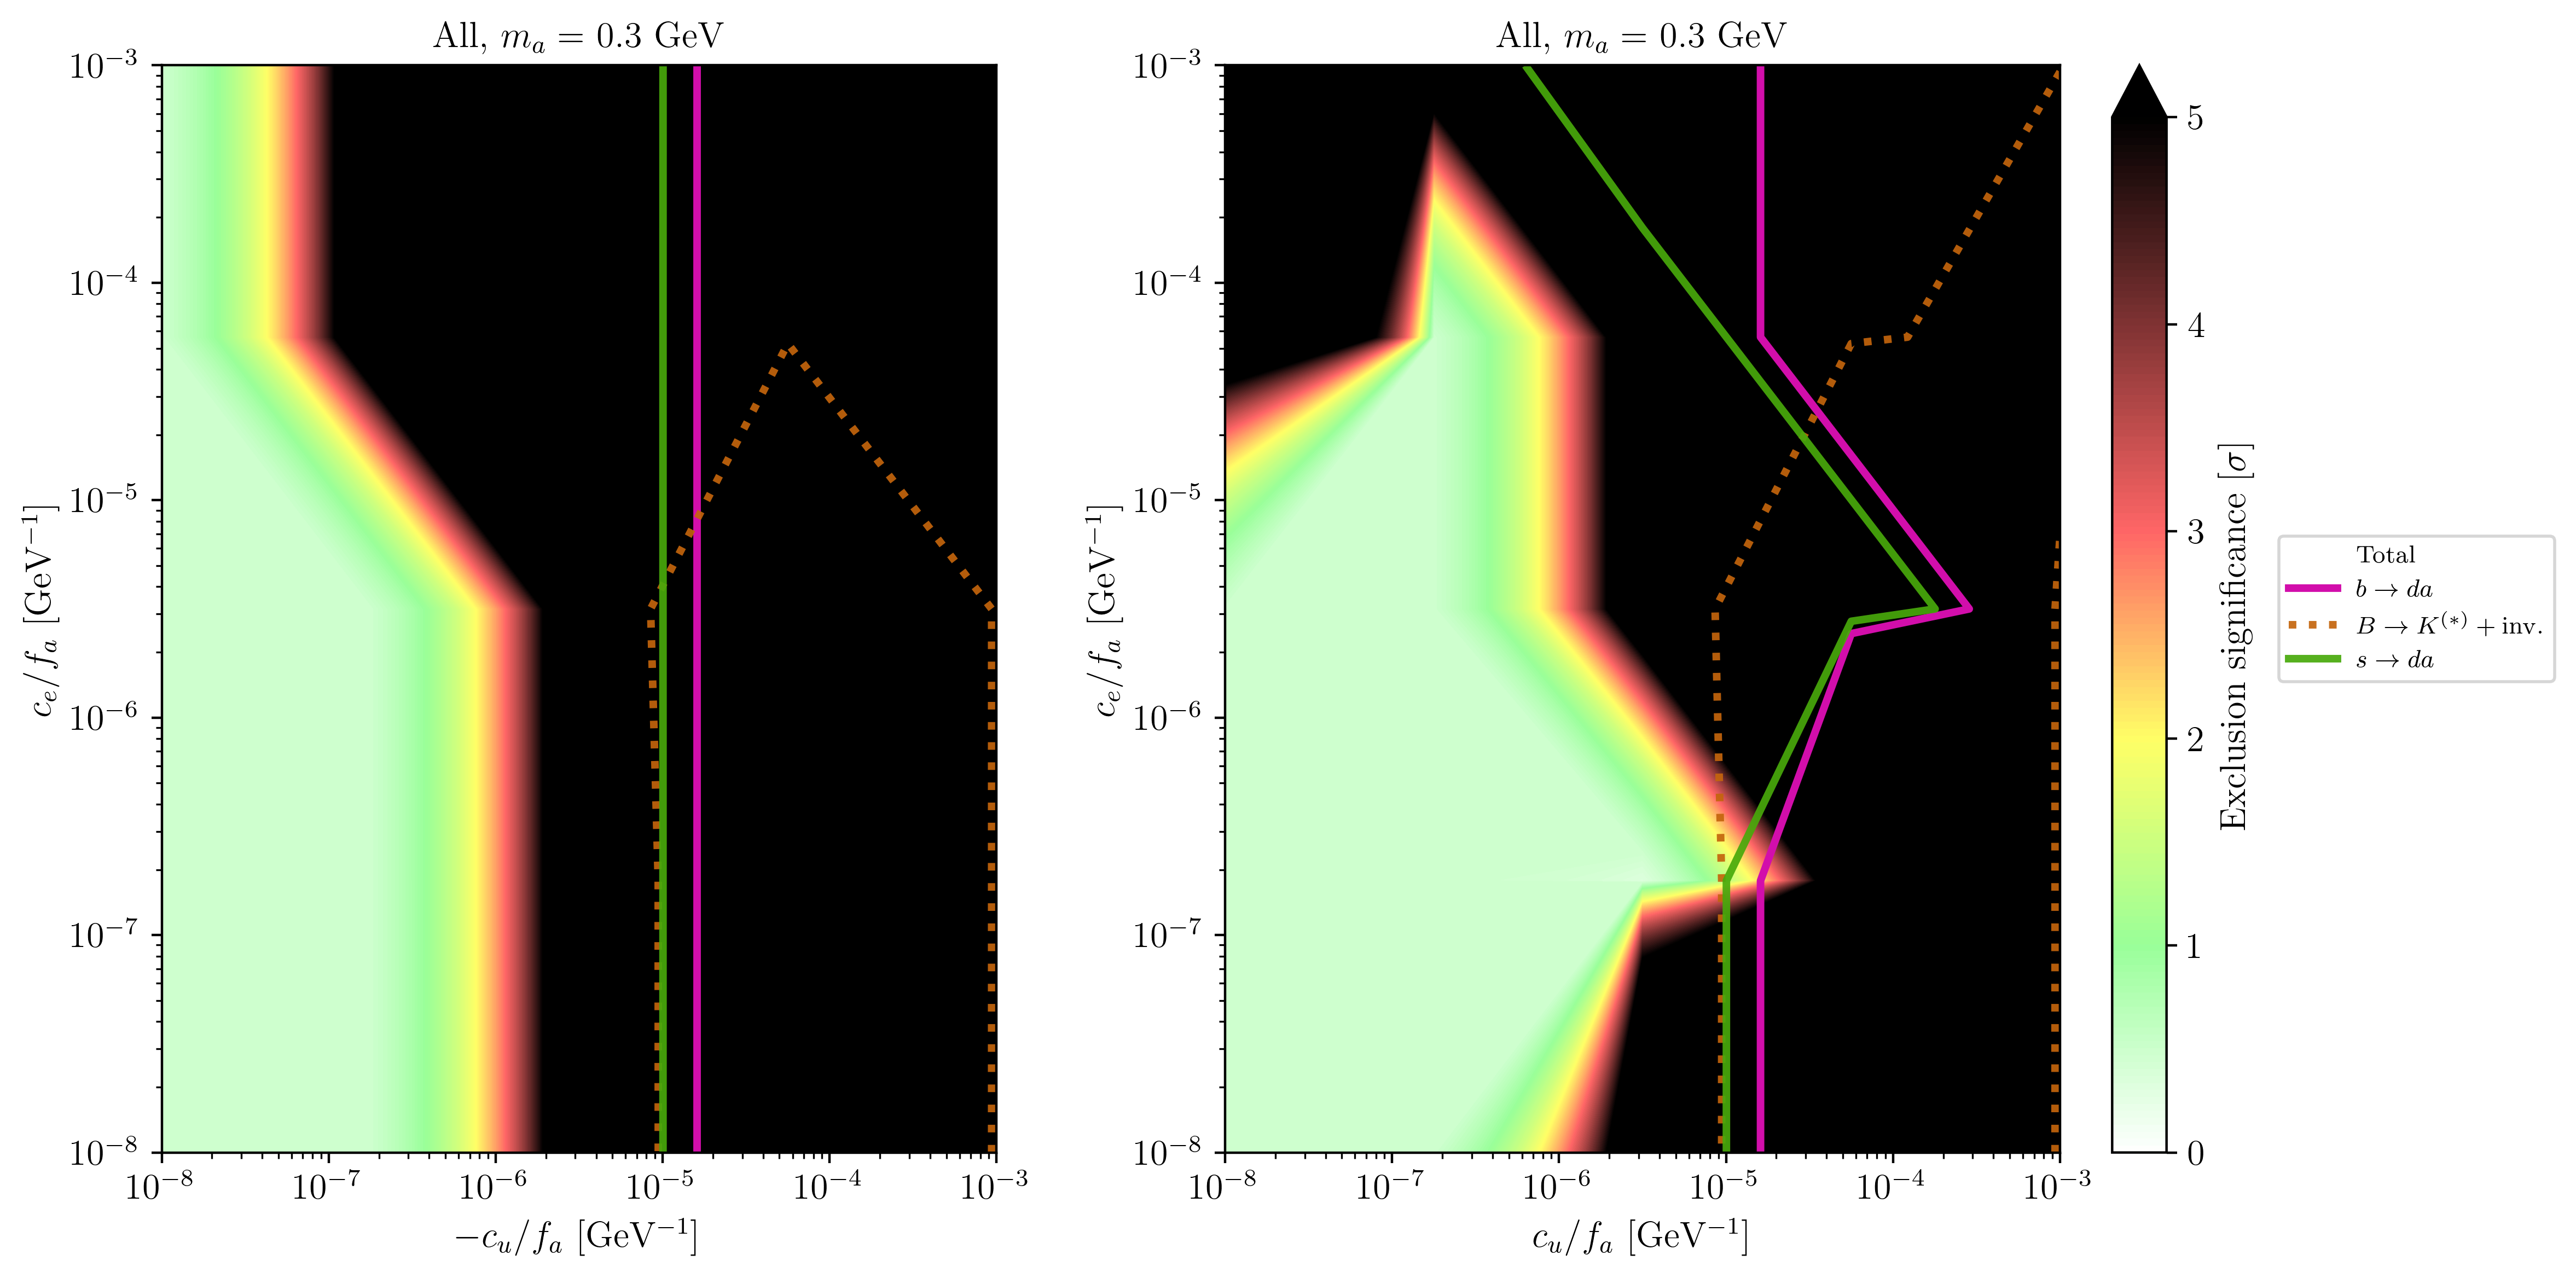

In [36]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi=400) #Subplot (1,2)

#Exclusion plot cu<0
exclusionplot(-cu_neg/fa, ce_neg/fa, chi2_cuce_neg_all, r'$-c_u/f_a$ [GeV$^{-1}$]', r'$c_e/f_a$ [GeV$^{-1}$]', rf'All, $m_a=$ {ma} GeV',ax=axs[0])
axs[0].get_legend().remove()

#Exclusion plot cu>0
exclusionplot(cu_pos/fa, ce_pos/fa, chi2_cuce_pos_all, r'$c_u/f_a$ [GeV$^{-1}$]', r'$c_e/f_a$ [GeV$^{-1}$]', rf'All, $m_a=$ {ma} GeV',ax=axs[1])
fig.axes[2].remove()

fig.tight_layout()
#plt.savefig('exclusion_cevscu_all_sectors.png', dpi=400, bbox_inches='tight')

We can try to extract more information from the plot to try to see which observables place the strongest contraints.

First we set each sector to have an specific colour for their $2\sigma$ line

In [37]:
for ii in range(len(chi2_cuce_neg_all)):
    if chi2_cuce_neg_all[ii].name == 'bda_lfu':
             chi2_cuce_neg_all[ii].set_plot_style(color="#d20eabff", lw = 2.5)
             chi2_cuce_pos_all[ii].set_plot_style(color="#d20eabff", lw = 2.5)                          
    elif chi2_cuce_neg_all[ii].name == 'bsa_lfu':
             chi2_cuce_neg_all[ii].set_plot_style(color="#009dffec", lw = 2.5)
             chi2_cuce_pos_all[ii].set_plot_style(color="#009dffec", lw = 2.5)
    elif chi2_cuce_neg_all[ii].name == 'sda_lfu':
             chi2_cuce_neg_all[ii].set_plot_style(color="#48a90beb", lw = 2.5)
             chi2_cuce_pos_all[ii].set_plot_style(color="#48a90beb", lw = 2.5)
    elif chi2_cuce_neg_all[ii].name == 'BKinv':
             chi2_cuce_neg_all[ii].set_plot_style(color="#c4650deb", lw = 2.5, ls='dotted')
             chi2_cuce_pos_all[ii].set_plot_style(color="#c4650deb", lw = 2.5, ls='dotted')
    else:
            chi2_cuce_neg_all[ii].set_plot_style(color="#0000ff00", lw = 0)
            chi2_cuce_pos_all[ii].set_plot_style(color="#0000ff00", lw = 0)

We choose the specific measurements that we want to plot

In [38]:
for jj in range(len(chi2_cuce_neg_all[0].split_measurements())):
                    #CHARM, B+ -> K+ mu mu
                    if 'B+ -> K+ muon muon @ CHARM' in chi2_cuce_neg_all[0].split_measurements()[jj].sector.name:
                            chi2_cuce_neg_Bplus_Kplusmumu_CHARM = chi2_cuce_neg_all[0].split_measurements()[jj]
                            chi2_cuce_neg_Bplus_Kplusmumu_CHARM.set_plot_style(color="#c40d0deb", lw = 2, ls='dashed')
                    #Belle II, B+ -> K+ mu mu
                    elif 'B+ -> K+ muon muon @ Belle II' in chi2_cuce_neg_all[0].split_measurements()[jj].sector.name:
                            chi2_cuce_neg_Bplus_Kplusmumu_Belle = chi2_cuce_neg_all[0].split_measurements()[jj]
                            chi2_cuce_neg_Bplus_Kplusmumu_Belle.set_plot_style(color="#0dc4a9eb", lw = 2, ls='dashed')
                    #LHCb, B+ -> K+ mu mu
                    elif 'B+ -> K+ muon muon @ LHCb' in chi2_cuce_neg_all[0].split_measurements()[jj].sector.name:
                            chi2_cuce_neg_Bplus_Kplusmumu_LHCb = chi2_cuce_neg_all[0].split_measurements()[jj]
                            chi2_cuce_neg_Bplus_Kplusmumu_LHCb.set_plot_style(color="#9850dbeb", lw = 2, ls='dashed')
                    #Belle, Upsilon(1S) -> alp photon
                    elif 'Upsilon(1S) -> alp photon @ Belle' in chi2_cuce_neg_all[0].split_measurements()[jj].sector.name:
                            chi2_cuce_neg_Upsilon1S_Belle = chi2_cuce_neg_all[0].split_measurements()[jj]
                            chi2_cuce_neg_Upsilon1S_Belle.set_plot_style(color="#4354d0eb", lw = 2, ls='dashed')

In [41]:
for jj in range(len(chi2_cuce_pos_all[0].split_measurements())):
                    #CHARM, B+ -> K+ mu mu
                    if 'B+ -> K+ muon muon @ CHARM' in chi2_cuce_pos_all[0].split_measurements()[jj].sector.name:
                            chi2_cuce_pos_Bplus_Kplusmumu_CHARM = chi2_cuce_pos_all[0].split_measurements()[jj]
                            chi2_cuce_pos_Bplus_Kplusmumu_CHARM.set_plot_style(color="#c40d0deb", lw = 2, ls='dashed')
                    #Belle II, B+ -> K+ mu mu
                    elif 'B+ -> K+ muon muon @ Belle II' in chi2_cuce_pos_all[0].split_measurements()[jj].sector.name:
                            chi2_cuce_pos_Bplus_Kplusmumu_Belle = chi2_cuce_pos_all[0].split_measurements()[jj]
                            chi2_cuce_pos_Bplus_Kplusmumu_Belle.set_plot_style(color="#0dc4a9eb", lw = 2, ls='dashed')
                    #LHCb, B+ -> K+ mu mu
                    elif 'B+ -> K+ muon muon @ LHCb' in chi2_cuce_pos_all[0].split_measurements()[jj].sector.name:
                            chi2_cuce_pos_Bplus_Kplusmumu_LHCb = chi2_cuce_pos_all[0].split_measurements()[jj]
                            chi2_cuce_pos_Bplus_Kplusmumu_LHCb.set_plot_style(color="#9850dbeb", lw = 2, ls='dashed')
                    #Belle, Upsilon(1S) -> alp photon
                    elif 'Upsilon(1S) -> alp photon @ Belle' in chi2_cuce_pos_all[0].split_measurements()[jj].sector.name:
                            chi2_cuce_pos_Upsilon1S_Belle = chi2_cuce_pos_all[0].split_measurements()[jj]
                            chi2_cuce_pos_Upsilon1S_Belle.set_plot_style(color="#4354d0eb", lw = 2, ls='dashed')

We create a list of the $\chi^2$ that we want to plot

In [42]:
chi2_cuce_neg_glob = [chi2_cuce_neg_all[4], chi2_cuce_neg_all[1], chi2_cuce_neg_all[3], chi2_cuce_neg_Bplus_Kplusmumu_CHARM,chi2_cuce_neg_Bplus_Kplusmumu_Belle, chi2_cuce_neg_Bplus_Kplusmumu_LHCb, chi2_cuce_neg_Upsilon1S_Belle]
chi2_cuce_pos_glob = [chi2_cuce_pos_all[4], chi2_cuce_pos_all[1], chi2_cuce_pos_all[3], chi2_cuce_pos_Bplus_Kplusmumu_CHARM,chi2_cuce_pos_Bplus_Kplusmumu_Belle, chi2_cuce_pos_Bplus_Kplusmumu_LHCb, chi2_cuce_pos_Upsilon1S_Belle]

### Plots

In the following plots, we will plot the list of $\chi^2$ selected in the step before and as global chi2 we plot the one of the sector that gives the biggest contraints

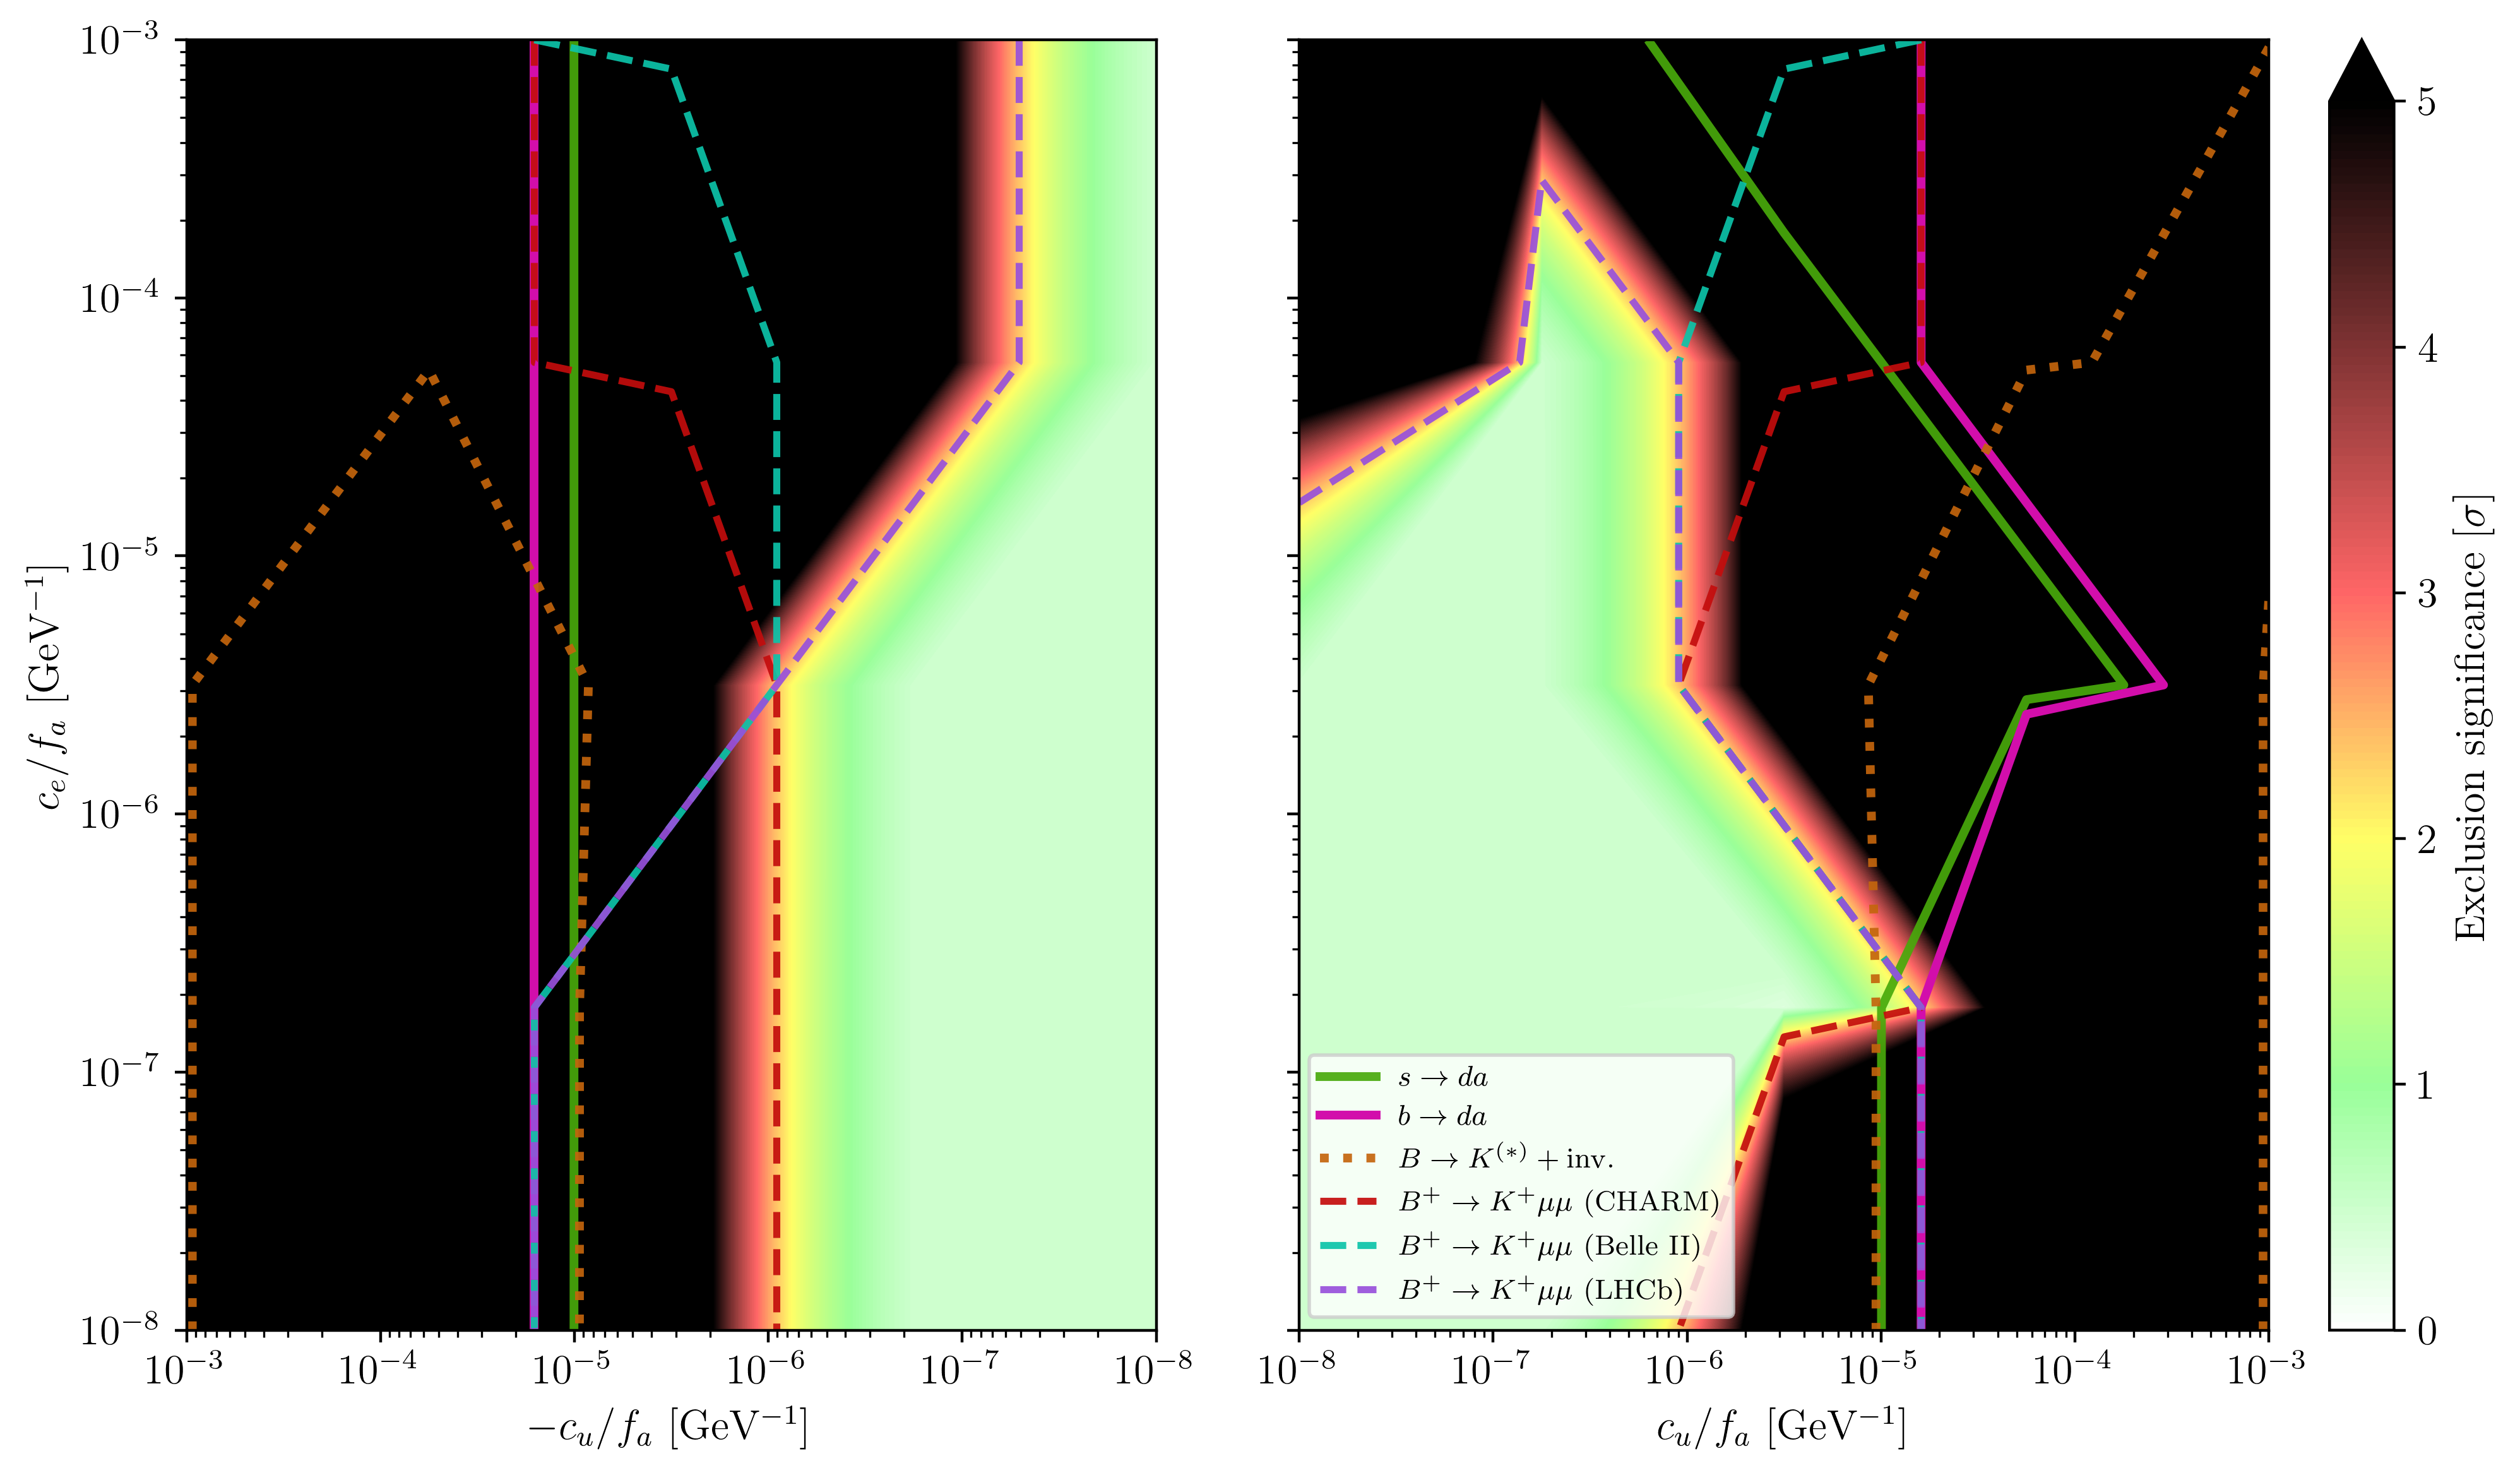

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,6), dpi=400, sharey=True)

#Exclusion plot cu<0
exclusionplot(-cu_neg/fa, ce_neg/fa, chi2_cuce_neg_glob, r'$-c_u/f_a$ [GeV$^{-1}$]', r'$c_e/f_a$ [GeV$^{-1}$]', None, ax=axs[0],global_chi2=chi2_cuce_neg_all[0])
axs[0].get_legend().remove()
axs[0].invert_xaxis() # Invert axis 

#Exclusion plot cu>0
exclusionplot(cu_pos/fa, ce_pos/fa, chi2_cuce_pos_glob, r'$c_u/f_a$ [GeV$^{-1}$]', None, None,ax=axs[1],global_chi2=chi2_cuce_pos_all[0])

fig.axes[2].remove() #Remove colorbar from plot in the left
fig.tight_layout()
legend1 = axs[1].get_legend()
legend1.set_loc('lower left')

legend1.set_bbox_to_anchor((0.01,0.01))
legend1.borderaxespad = 0

# Save figures
# plt.savefig('exclusion_cevscu_all_sectors.png', dpi=400, bbox_inches='tight')
# plt.savefig('exclusion_cevscu_all_sectors.pdf', dpi=400, bbox_inches='tight')

## References

<a id="AlpacaPheno">[0]</a>    
J. Alda, M. Fuentes Zamoro, L. Merlo, X. Ponce Diaz, S. Rigolin    
*Comprehensive ALP searches in Meson Decays*,    
In preparation.